In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clustering-big-data/Clustering.csv
/kaggle/input/clustering-big-data/Emitten.csv


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline
from scipy import stats

# 1. Exploratory Data Analysis
# 1.1 Load Data

In [3]:
df0 = pd.read_csv('../input/clustering-big-data/Clustering.csv')
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Emitten                  19 non-null     object 
 1   DER                      19 non-null     float64
 2   Operating Profit Margin  19 non-null     float64
 3   Sales Growth             19 non-null     float64
 4   Return On Asset          19 non-null     float64
 5   Category                 0 non-null      float64
dtypes: float64(5), object(1)
memory usage: 1.0+ KB


In [4]:
df0.describe()

,DER,Operating Profit Margin,Sales Growth,Return On Asset,Category
count,19.000000,19.000000,19.000000,19.000000,0.0
mean,1.677137,-0.033534,1.251155,0.033923,NaN
std,2.615720,0.572822,0.325129,0.119803,NaN
min,-1.322743,-2.007213,0.637814,-0.178472,NaN
25%,0.443561,-0.013364,1.056122,-0.040850,NaN
50%,0.758859,0.150501,1.279567,0.043147,NaN
75%,1.542588,0.231707,1.404820,0.073551,NaN
max,10.614012,0.458206,1.898171,0.405886,NaN


# 1.2 Data Cleansing

In [5]:
df0.drop(["Emitten","Category"], axis=1, inplace=True)

# 1.3 Scatter Plot

<Figure size 1080x1080 with 0 Axes>

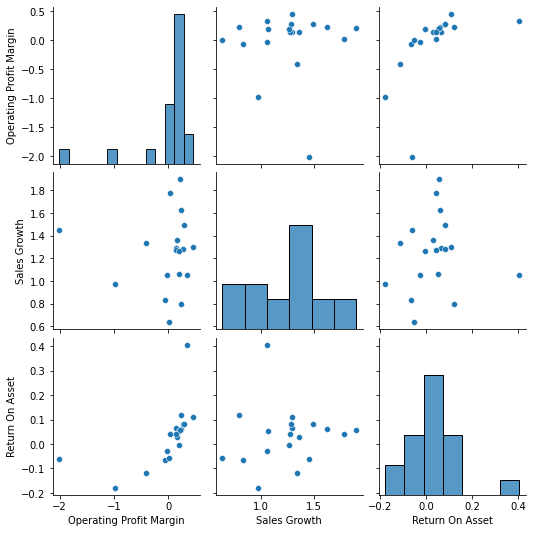

In [6]:
plt.figure(figsize=(15, 15))
sns.pairplot(df0, vars = df0.columns[1:13]);


# 2. Clustering
# 2.1 Load Data

In [7]:
df0 = pd.read_csv('../input/clustering-big-data/Clustering.csv')
df1 = df0[['DER','Operating Profit Margin' ,'Sales Growth','Return On Asset','Category']]
df1.describe()

,DER,Operating Profit Margin,Sales Growth,Return On Asset,Category
count,19.000000,19.000000,19.000000,19.000000,0.0
mean,1.677137,-0.033534,1.251155,0.033923,NaN
std,2.615720,0.572822,0.325129,0.119803,NaN
min,-1.322743,-2.007213,0.637814,-0.178472,NaN
25%,0.443561,-0.013364,1.056122,-0.040850,NaN
50%,0.758859,0.150501,1.279567,0.043147,NaN
75%,1.542588,0.231707,1.404820,0.073551,NaN
max,10.614012,0.458206,1.898171,0.405886,NaN


<AxesSubplot:xlabel='Emitten', ylabel='Operating Profit Margin'>

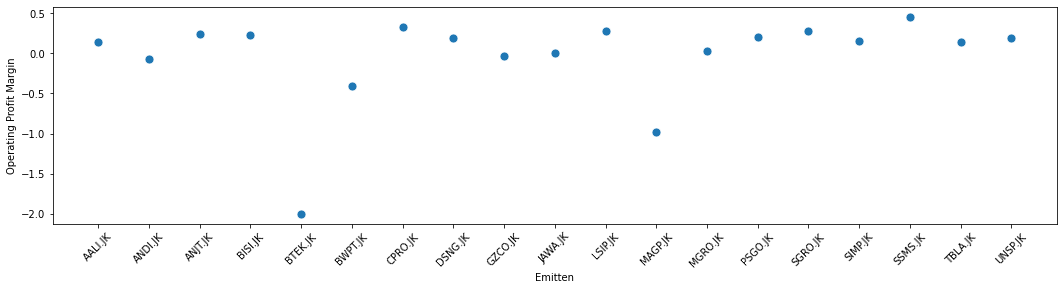

In [8]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emitten', y='Operating Profit Margin', 
                data=df0, s=80)

<AxesSubplot:xlabel='Emitten', ylabel='DER'>

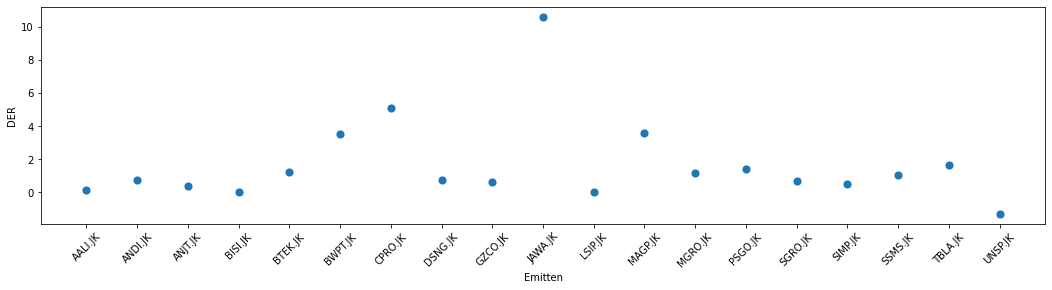

In [9]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emitten', y='DER', 
                data=df0, s=80)

<AxesSubplot:xlabel='Emitten', ylabel='Sales Growth'>

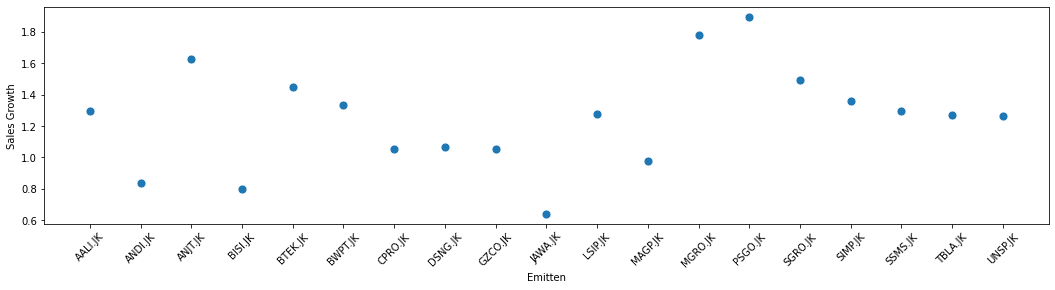

In [10]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emitten', y='Sales Growth', 
                data=df0, s=80)

# 2.2 Outlier

In [11]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df1)}')

filtered_entries = np.array([False] * len(df1))
for col in ['Operating Profit Margin']:
    zscore = abs(stats.zscore(df1[col]))
    filtered_entries = (zscore < 3) | filtered_entries
    
df1 = df1[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df1)}')

Jumlah baris sebelum memfilter outlier: 19
Jumlah baris setelah memfilter outlier: 18


In [12]:
df1.describe()

,DER,Operating Profit Margin,Sales Growth,Return On Asset,Category
count,18.000000,18.000000,18.000000,18.000000,0.0
mean,1.701468,0.076115,1.240024,0.039138,NaN
std,2.689341,0.324893,0.330809,0.121038,NaN
min,-1.322743,-0.980925,0.637814,-0.178472,NaN
25%,0.419312,0.009941,1.055776,-0.020837,NaN
50%,0.757266,0.172038,1.276314,0.048089,NaN
75%,1.593823,0.233867,1.352702,0.077902,NaN
max,10.614012,0.458206,1.898171,0.405886,NaN


# 2.3 Standardisasi Fitur

In [13]:
feats = ['DER','Operating Profit Margin','Sales Growth','Return On Asset']
X = df1[feats].values
y = df1['Category'].values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
new_df = pd.DataFrame(data = X_std, columns = feats)
new_df.describe()

,DER,Operating Profit Margin,Sales Growth,Return On Asset
count,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01
mean,-2.467162e-17,4.625929e-17,-2.698459e-16,3.083953e-17
std,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00
min,-1.157119e+00,-3.347827e+00,-1.873192e+00,-1.849993e+00
25%,-4.905768e-01,-2.095839e-01,-5.731116e-01,-5.098703e-01
50%,-3.612694e-01,3.038043e-01,1.128796e-01,7.609588e-02
75%,-4.118713e-02,4.996275e-01,3.504885e-01,3.295530e-01
max,3.410104e+00,1.210151e+00,2.047184e+00,3.117884e+00


# 2.4 Lakukan K-means

In [14]:
from sklearn.cluster import KMeans
wcss=[]

In [15]:
df0.shape

(19, 6)

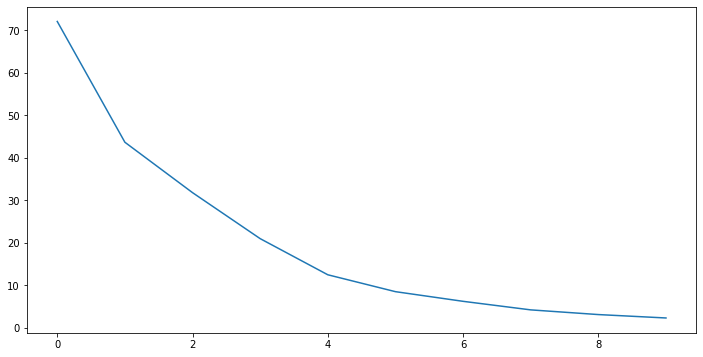

In [16]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(new_df.values)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(inertia) #Elbow Method

# 2.5 Pilih Jumlah Cluster

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(new_df.values)

KMeans(n_clusters=5, random_state=0)

In [18]:
new_df['target'] = y
new_df['fit'] = kmeans.labels_

# 2.6 Plot Cluster

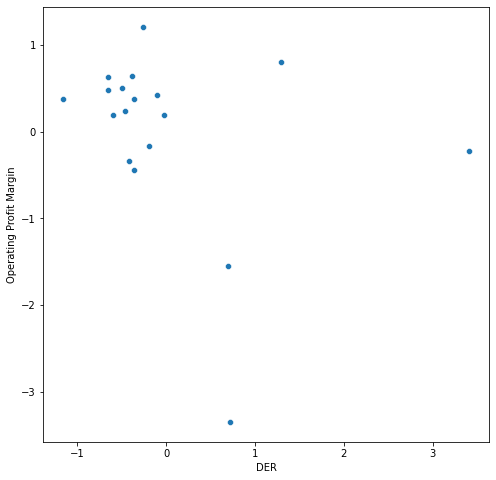

In [19]:
plt.rcParams["figure.figsize"] = (8, 8)
sns.scatterplot(x='DER', y='Operating Profit Margin', hue=new_df.target.to_list(), data=new_df);

In [20]:
new_df.head(5)

,DER,Operating Profit Margin,Sales Growth,Return On Asset,target,fit
0,-0.599301,0.186989,0.165534,0.218572,NaN,2
1,-0.360660,-0.445530,-1.261053,-0.885094,NaN,2
2,-0.499855,0.506469,1.199933,0.188653,NaN,0
3,-0.650775,0.479104,-1.375781,0.682278,NaN,2
4,0.694736,-1.546598,0.299837,-1.323296,NaN,1


In [21]:
new_df.insert(0,"Category",np.nan,True)
new_df.loc[new_df['fit'] == 0, 'Category'] = 2
new_df.loc[new_df['fit'] == 1, 'Category'] = 4
new_df.loc[new_df['fit'] == 2, 'Category'] = 1
new_df.loc[new_df['fit'] == 3, 'Category'] = 0
new_df.loc[new_df['fit'] == 4, 'Category'] = 3
new_df['Category'] = new_df['Category'].astype(int)
new_df.head(5)

,Category,DER,Operating Profit Margin,Sales Growth,Return On Asset,target,fit
0,1,-0.599301,0.186989,0.165534,0.218572,NaN,2
1,1,-0.360660,-0.445530,-1.261053,-0.885094,NaN,2
2,2,-0.499855,0.506469,1.199933,0.188653,NaN,0
3,1,-0.650775,0.479104,-1.375781,0.682278,NaN,2
4,4,0.694736,-1.546598,0.299837,-1.323296,NaN,1


In [22]:
new_df.drop(["fit","target"], axis=1, inplace=True)
new_df.columns = ['Category','DER (St.)','Operating Profit Margin (St.)','Sales Growth (St.)','Return On Asset (St.)']
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       18 non-null     int64  
 1   DER (St.)                      18 non-null     float64
 2   Operating Profit Margin (St.)  18 non-null     float64
 3   Sales Growth (St.)             18 non-null     float64
 4   Return On Asset (St.)          18 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 848.0 bytes


# 2.6.1 3D Scatter Plot

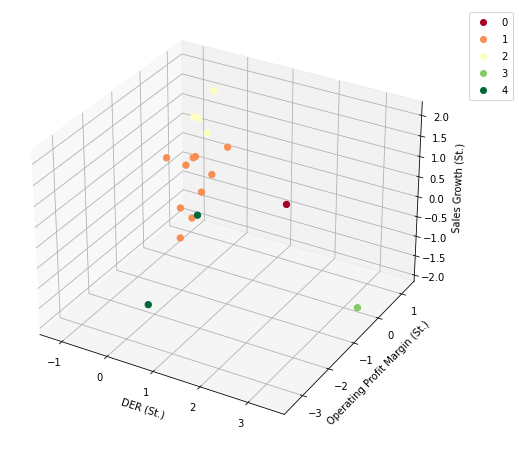

In [23]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


x = new_df['DER (St.)']
y = new_df['Operating Profit Margin (St.)']
z = new_df['Sales Growth (St.)']

ax.set_xlabel("DER (St.)")
ax.set_ylabel("Operating Profit Margin (St.)")
ax.set_zlabel("Sales Growth (St.)")

cmap = ListedColormap(sns.color_palette("RdYlGn", 256).as_hex())

sc = ax.scatter(x, y, z, s=40, c=new_df['Category'], marker='o', cmap=cmap, alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

# 2.6.2 X vs Z View

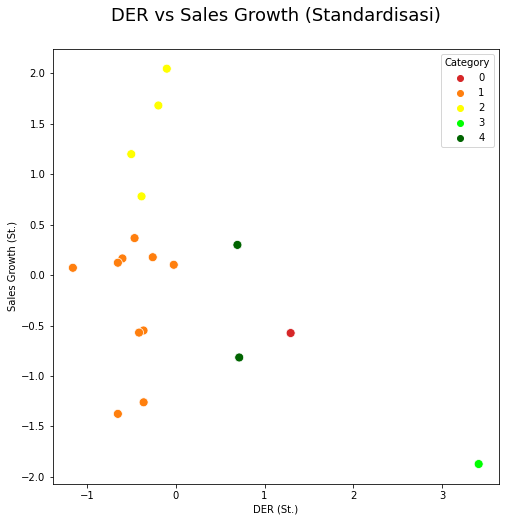

In [24]:
# color palette as dictionary
palette = {0:"tab:red",
           1:"tab:orange", 
           2:"yellow",
           3:"lime",
           4:"darkgreen"}

sns.scatterplot(x='DER (St.)', y='Sales Growth (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("DER vs Sales Growth (Standardisasi)", fontsize=18, y=1.05)
plt.show()

# 2.6.3 Y vs Z View

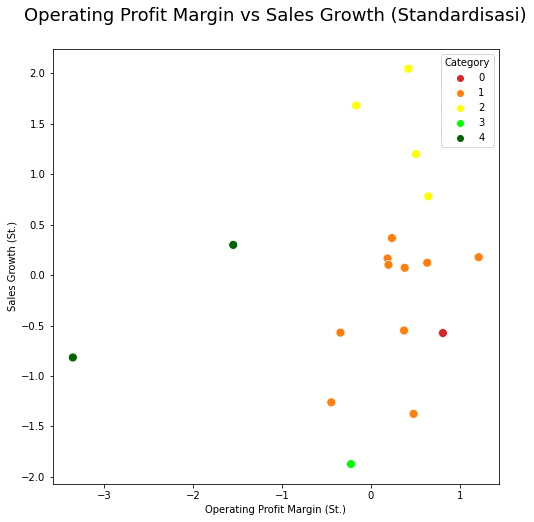

In [25]:
sns.scatterplot(x='Operating Profit Margin (St.)', y='Sales Growth (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("Operating Profit Margin vs Sales Growth (Standardisasi)", fontsize=18, y=1.05)
plt.show()

# 2.6.4 X vs Y View

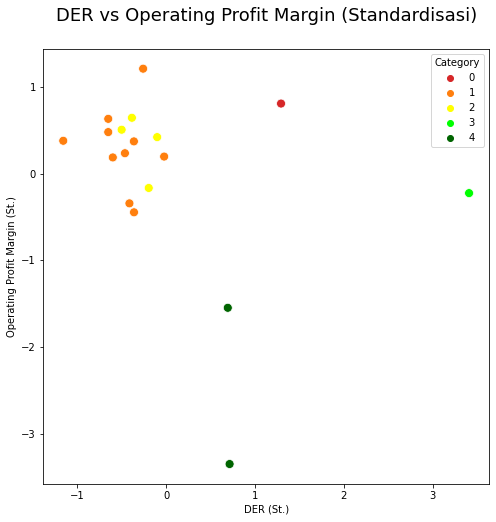

In [26]:
sns.scatterplot(x='DER (St.)', y='Operating Profit Margin (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("DER vs Operating Profit Margin (Standardisasi)", fontsize=18, y=1.05)
plt.show()

# 3. Export Result

In [27]:
# drop these row indexes
# from dataFrame
index_names = df0[ df0['Emitten'] == 'ARTO' ].index
df0.drop(index_names, inplace = True)
df0.reset_index(drop=True, inplace=True)
df0.drop(["Category"
         ], axis=1, inplace=True)

In [28]:
dftemp = pd.read_csv('../input/clustering-big-data/Emitten.csv')
df = pd.concat([dftemp, new_df, df0], axis=1)
df.head(6)

,Industry,Company,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),Return On Asset (St.),Emitten,DER,Operating Profit Margin,Sales Growth,Return On Asset
0,Pertanian,PT Astra Agro Lestari Tbk (AALI.JK),1.0,-0.599301,0.186989,0.165534,0.218572,AALI.JK,0.135154,0.135154,1.293241,0.064848
1,Pertanian,"PT. Andira Agro, Tbk (ANDI.JK)",1.0,-0.360660,-0.445530,-1.261053,-0.885094,ANDI.JK,0.758859,-0.064557,0.834610,-0.064974
2,Pertanian,PT Austindo Nusantara Jaya Tbk (ANJT.JK),2.0,-0.499855,0.506469,1.199933,0.188653,ANJT.JK,0.395062,0.236027,1.625789,0.061328
3,Pertanian,PT BISI International Tbk (BISI.JK),1.0,-0.650775,0.479104,-1.375781,0.682278,BISI.JK,0.000624,0.227386,0.797727,0.119392
4,Pertanian,PT Bumi Teknokultura Unggul Tbk (BTEK.JK),4.0,0.694736,-1.546598,0.299837,-1.323296,BTEK.JK,1.239184,-2.007213,1.451510,-0.059932
5,Pertanian,PT Eagle High Plantations Tbk (BWPT.JK),0.0,1.293972,0.808185,-0.574191,3.117884,BWPT.JK,3.517208,-0.412206,1.336419,-0.116518


In [29]:
df.to_csv('result.csv', index = False)

# 4. Get Centroid

In [30]:
kmeans.cluster_centers_

array([[-0.29471451,  0.35171319,  1.42760861,  0.18592565],
       [ 0.704971  , -2.44721258, -0.258319  , -1.5866442 ],
       [-0.49351598,  0.29037983, -0.27464134,  0.01139135],
       [ 1.29397158,  0.80818546, -0.57419094,  3.1178844 ],
       [ 3.41010427, -0.22441135, -1.87319213, -0.80221212]])

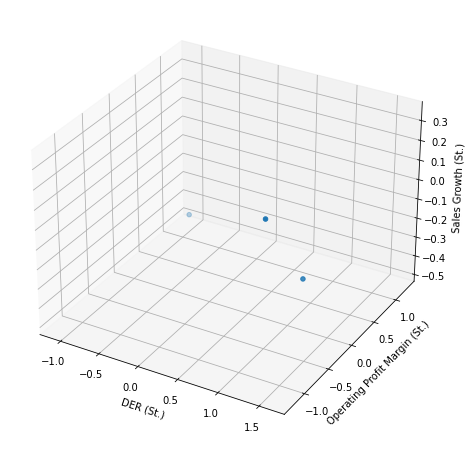

In [31]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = [-1.0747699 ,  1.60761561,  1.45000206]
y = [ 1.25270712, -0.73415244, -1.22811141]
z = [-0.47688144, -0.04643691,  0.33540692]

ax.set_xlabel("DER (St.)")
ax.set_ylabel("Operating Profit Margin (St.)")
ax.set_zlabel("Sales Growth (St.)")
ax.scatter(x, y, z)
plt.show()

# 5. Cluster Description

In [32]:
#Highly Positively Impacted
df[df['Category'] == 4].describe() 

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),Return On Asset (St.),DER,Operating Profit Margin,Sales Growth,Return On Asset
count,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,4.0,0.704971,-2.447213,-0.258319,-1.586644,0.620009,-0.865795,1.365539,0.011854
std,0.0,0.014475,1.273661,0.789352,0.372431,0.875645,1.614209,0.121582,0.101521
min,4.0,0.694736,-3.347827,-0.816475,-1.849993,0.000834,-2.007213,1.279567,-0.059932
25%,4.0,0.699853,-2.897520,-0.537397,-1.718318,0.310421,-1.436504,1.322553,-0.024039
50%,4.0,0.704971,-2.447213,-0.258319,-1.586644,0.620009,-0.865795,1.365539,0.011854
75%,4.0,0.710089,-1.996905,0.020759,-1.454970,0.929596,-0.295085,1.408524,0.047747
max,4.0,0.715206,-1.546598,0.299837,-1.323296,1.239184,0.275624,1.451510,0.083640


In [33]:
#Highly Positively Impacted
df[df['Category'] == 3].describe() 

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),Return On Asset (St.),DER,Operating Profit Margin,Sales Growth,Return On Asset
count,1.0,1.000000,1.000000,1.000000,1.000000,1.000,1.000000,1.000000,1.000000
mean,3.0,3.410104,-0.224411,-1.873192,-0.802212,0.624,-0.031987,1.056816,-0.026476
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.0,3.410104,-0.224411,-1.873192,-0.802212,0.624,-0.031987,1.056816,-0.026476
25%,3.0,3.410104,-0.224411,-1.873192,-0.802212,0.624,-0.031987,1.056816,-0.026476
50%,3.0,3.410104,-0.224411,-1.873192,-0.802212,0.624,-0.031987,1.056816,-0.026476
75%,3.0,3.410104,-0.224411,-1.873192,-0.802212,0.624,-0.031987,1.056816,-0.026476
max,3.0,3.410104,-0.224411,-1.873192,-0.802212,0.624,-0.031987,1.056816,-0.026476


In [34]:
#Highly Positively Impacted
df[df['Category'] == 2].describe() 

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),Return On Asset (St.),DER,Operating Profit Margin,Sales Growth,Return On Asset
count,4.0,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,2.0,-0.294715,0.351713,1.427609,0.185926,1.649577,-0.127945,1.570584,-0.004174
std,0.0,0.180739,0.356575,0.553331,0.137452,1.356149,0.576412,0.410801,0.116460
min,2.0,-0.499855,-0.165102,0.781092,0.034089,0.395062,-0.980925,0.977537,-0.178472
25%,2.0,-0.413139,0.274688,1.095223,0.124333,0.993079,-0.227242,1.463726,-0.012257
50%,2.0,-0.289503,0.463877,1.441079,0.171533,1.316269,0.116558,1.703315,0.050224
75%,2.0,-0.171078,0.540902,1.773465,0.233126,1.972766,0.215855,1.810173,0.058308
max,2.0,-0.099997,0.644201,2.047184,0.366547,3.570709,0.236027,1.898171,0.061328


In [35]:
#Highly Positively Impacted
df[df['Category'] == 1].describe() 

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),Return On Asset (St.),DER,Operating Profit Margin,Sales Growth,Return On Asset
count,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1.0,-0.493516,0.290380,-0.274641,0.011391,2.120882,0.185462,1.110184,0.078445
std,0.0,0.302148,0.468700,0.630683,0.501710,3.319476,0.151762,0.279579,0.130401
min,1.0,-1.157119,-0.445530,-1.375781,-0.885094,0.000624,-0.064557,0.637814,-0.064974
25%,1.0,-0.637846,0.189473,-0.564654,-0.299575,0.543356,0.135939,0.889815,0.031135
50%,1.0,-0.437501,0.303804,0.087821,0.073161,0.757266,0.172038,1.168295,0.058939
75%,1.0,-0.360965,0.454091,0.154900,0.338395,1.490489,0.266482,1.296185,0.102627
max,1.0,-0.021584,1.210151,0.367372,0.682278,10.614012,0.458206,1.491136,0.405886


In [36]:
#Highly Positively Impacted
df[df['Category'] == 0].describe() 

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),Return On Asset (St.),DER,Operating Profit Margin,Sales Growth,Return On Asset
count,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mean,0.0,1.293972,0.808185,-0.574191,3.117884,3.517208,-0.412206,1.336419,-0.116518
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0,1.293972,0.808185,-0.574191,3.117884,3.517208,-0.412206,1.336419,-0.116518
25%,0.0,1.293972,0.808185,-0.574191,3.117884,3.517208,-0.412206,1.336419,-0.116518
50%,0.0,1.293972,0.808185,-0.574191,3.117884,3.517208,-0.412206,1.336419,-0.116518
75%,0.0,1.293972,0.808185,-0.574191,3.117884,3.517208,-0.412206,1.336419,-0.116518
max,0.0,1.293972,0.808185,-0.574191,3.117884,3.517208,-0.412206,1.336419,-0.116518
